In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers

# Minst number

In [75]:
# Model / data parameters

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

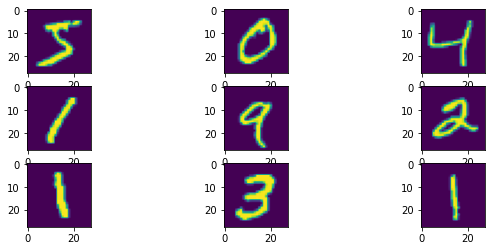

In [76]:
import matplotlib.pyplot as plt
j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(10, 4))
axes_ = axes.flatten()
for i in range(9):
    image=x_train[i]
    axes_[i].imshow(image)
plt.show()

In [77]:
# Make sure images have shape (28, 28, 1) <== because you want one channel !!
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [78]:
num_classes = np.unique(y_train).shape[0]
input_shape = x_train.shape[1:] # 28, 28, 1
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## build model

In [63]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2022-06-16 14:57:00.304632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-16 14:57:00.304788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 14:57:00.304827: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-16 14:57:00.304854: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-16 14:57:00.304879: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [64]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 11s 24ms/step - loss: 0.3757 - accuracy: 0.8874 - val_loss: 0.0813 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 9s 22ms/step - loss: 0.1088 - accuracy: 0.9670 - val_loss: 0.0576 - val_accuracy: 0.9850
Epoch 3/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0834 - accuracy: 0.9749 - val_loss: 0.0481 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0726 - accuracy: 0.9779 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 10s 24ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0380 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 10s 23ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0370 - val_accuracy: 0.

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02474180981516838
Test accuracy: 0.9911999702453613


1/1 [==============================] - 0s 14ms/step


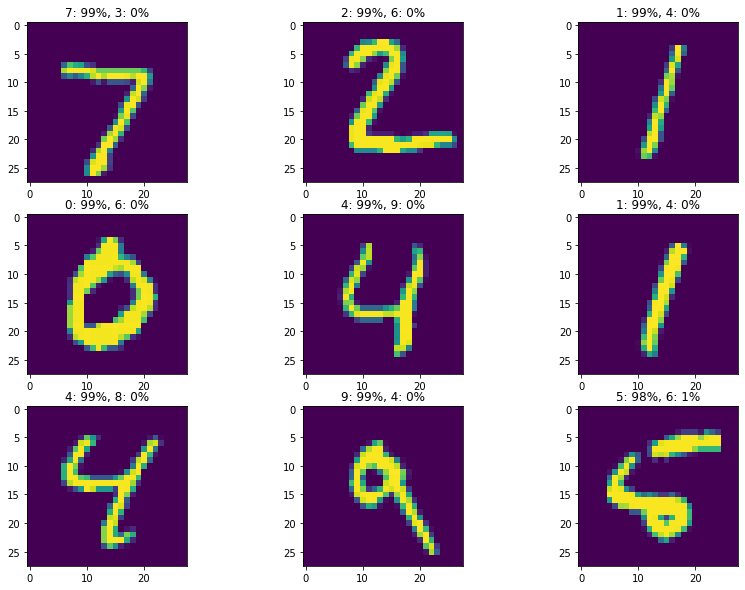

In [121]:
import matplotlib.pyplot as plt

j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(14, 10))
axes_ = axes.flatten()
for i in range(9):
    image=X_test[i]
    axes_[i].imshow(image)
    y_pred = model.predict(x_test[[i]])[0]
    idx = np.argsort(y_pred)[-2:][::-1]
    prediction = f'{idx[0]}: {int(y_pred[idx[0]]*100)}%, {idx[1]}: {int(y_pred[idx[1]]*100)}%'
    axes_[i].set_title(prediction)
plt.show()

# MINST FASHION

In [126]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

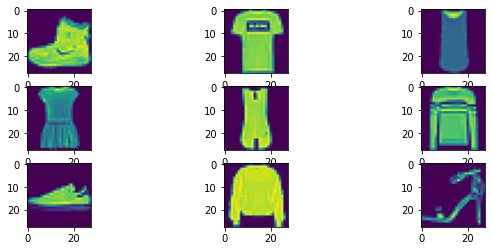

In [125]:
import matplotlib.pyplot as plt
j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(10, 4))
axes_ = axes.flatten()
for i in range(9):
    image=X_train[i]
    axes_[i].imshow(image)
plt.show()

In [127]:
# Make sure images have shape (28, 28, 1) <== because you want one channel !!
x_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(X_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [128]:
num_classes = np.unique(y_train).shape[0]
input_shape = x_train.shape[1:] # 28, 28, 1
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [129]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [130]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 8s 18ms/step - loss: 0.6914 - accuracy: 0.7516 - val_loss: 0.4406 - val_accuracy: 0.8432
Epoch 2/15
422/422 [==============================] - 7s 16ms/step - loss: 0.4523 - accuracy: 0.8391 - val_loss: 0.3843 - val_accuracy: 0.8617
Epoch 3/15
422/422 [==============================] - 8s 19ms/step - loss: 0.4065 - accuracy: 0.8547 - val_loss: 0.3543 - val_accuracy: 0.8723
Epoch 4/15
422/422 [==============================] - 8s 19ms/step - loss: 0.3785 - accuracy: 0.8638 - val_loss: 0.3387 - val_accuracy: 0.8793
Epoch 5/15
422/422 [==============================] - 7s 17ms/step - loss: 0.3568 - accuracy: 0.8734 - val_loss: 0.3202 - val_accuracy: 0.8837
Epoch 6/15
422/422 [==============================] - 8s 20ms/step - loss: 0.3429 - accuracy: 0.8763 - val_loss: 0.3129 - val_accuracy: 0.8842
Epoch 7/15
422/422 [==============================] - 7s 17ms/step - loss: 0.3263 - accuracy: 0.8831 - val_loss: 0.2966 - val_accuracy: 0.8922

In [131]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2722645103931427
Test accuracy: 0.9017999768257141


In [134]:
dict_label={
    0:'T-shirt/Top', 1:'Trouser',
    2:'Pullover', 3:'Dress', 4:'Coat',
    5:'Sandal', 6:'Shirt', 7:'Sneaker',
    8:'Bag', 9:'Ankle boot'
}

1/1 [==============================] - 0s 11ms/step


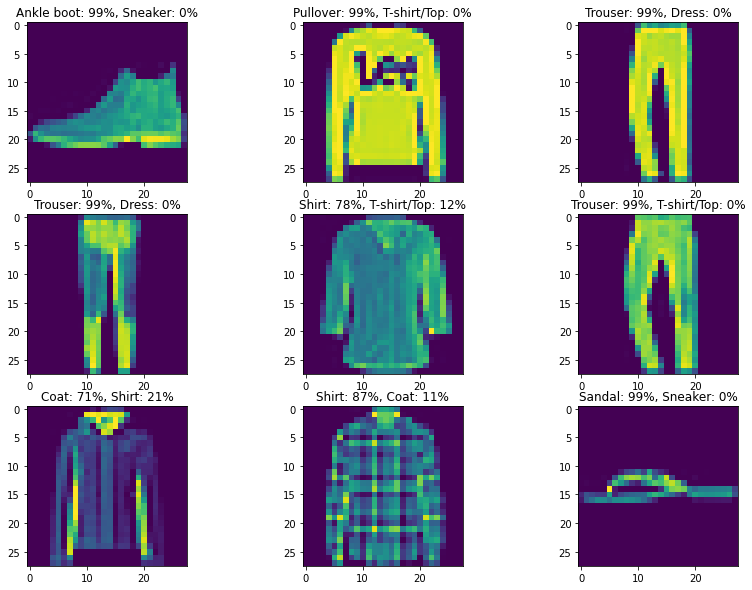

In [135]:
import matplotlib.pyplot as plt

j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(14, 10))
axes_ = axes.flatten()
for i in range(9):
    image=X_test[i]
    axes_[i].imshow(image)
    y_pred = model.predict(x_test[[i]])[0]
    idx = np.argsort(y_pred)[-2:][::-1]
    prediction = f'{dict_label[idx[0]]}: {int(y_pred[idx[0]]*100)}%, {dict_label[idx[1]]}: {int(y_pred[idx[1]]*100)}%'
    axes_[i].set_title(prediction)
plt.show()